## Applied - Question 15

The question involve Boston dataset - a data frame with 506 observations and 14 variables.
The data was originally published by Harrison, 
D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', 
J. Environ. Economics & Management, vol.5, 81-102, 1978.

There are 14 attributes in each case of the dataset. They are:

  1. CRIM - per capita crime rate by town  
  2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
  3. INDUS - proportion of non-retail business acres per town.
  4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
  5. NOX - nitric oxides concentration (parts per 10 million)
  6. RM - average number of rooms per dwelling
  7. AGE - proportion of owner-occupied units built prior to 1940
  8. DIS - weighted distances to five Boston employment centres
  9. RAD - index of accessibility to radial highways
  10. TAX - full-value property-tax rate per $10,000
  11. PTRATIO - pupil-teacher ratio by town
  12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
  13. LSTAT - % lower status of the population
  14. MEDV - Median value of owner-occupied homes in $1000's

We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

Import block

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

Getting the data

In [3]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
boston = pd.read_csv(f'{data_path}Boston.csv')
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Running each response vs predictor is very tedious process. But lets power on!

In [4]:
uni_coef = []
for i in range(1, 14):
    var = boston.columns[i]
    model_fit = smf.ols(f'crim ~ {var}', data=boston).fit()
    # Create uni_coef for the next question
    uni_coef.append(model_fit.params[f'{var}'])
    if model_fit.pvalues[f'{var}'] < 0.05:
        print(model_fit.params)
    else:
        print(f'{var} is not statistically significant')
    print()

Intercept    4.453694
zn          -0.073935
dtype: float64

Intercept   -2.063743
indus        0.509776
dtype: float64

chas is not statistically significant

Intercept   -13.719882
nox          31.248531
dtype: float64

Intercept    20.481804
rm           -2.684051
dtype: float64

Intercept   -3.777906
age          0.107786
dtype: float64

Intercept    9.499262
dis         -1.550902
dtype: float64

Intercept   -2.287159
rad          0.617911
dtype: float64

Intercept   -8.528369
tax          0.029742
dtype: float64

Intercept   -17.646933
ptratio       1.151983
dtype: float64

Intercept    16.553529
black        -0.036280
dtype: float64

Intercept   -3.330538
lstat        0.548805
dtype: float64

Intercept    11.796536
medv         -0.363160
dtype: float64



Nice! So only chas - bounded by Charles river, variable is not statistically significant assuming 
the $\alpha = 0.05$

(b) Lets ram all of our predictor in there now!

In [5]:
var_all = '+'.join(boston.columns.drop('crim'))
model = smf.ols(f'crim ~ {var_all}', data=boston)
model_fit = model.fit()
print(model_fit.summary())

multi_coef = model_fit.params[1:]

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.57e-56
Time:                        06:23:58   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

First, we observe the F-statistic is not much larger than 1 and its associated p-values is near 0 
which is an ok sign.

Second, using null hypothesis $H_0 : \hat{\beta_i} = 0$ we can reject the following variables.
 1. zn
 2. dis
 3. rad
 4. black
 5. medv

(c)

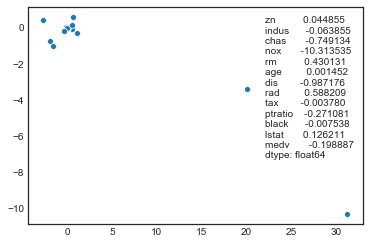

In [6]:
sns.scatterplot(x=uni_coef, y=multi_coef, label=multi_coef)

(d) Again fitting multiple polynomial is tough but lets employ the same tactic.

In [17]:
for i in range(1, 14):
    var = boston.columns[i]
    p1 = f'{var}'
    p2 = f'np.power({var}, 2)'
    p3 = f'np.power({var}, 3)'
    model_fit = smf.ols(f'crim ~ {var} + {p2} + {p3}', data=boston).fit()
    for p in [p1, p2, p3]:
        if model_fit.pvalues[p] < 0.05:
            print(p + ' coef : ' + str(model_fit.params[p]))
        else:
            print(f'{p} is not statistically significant')
    print()
    

zn coef : -0.33218841472190114
np.power(zn, 2) is not statistically significant
np.power(zn, 3) is not statistically significant

indus coef : -1.9652129343068996
np.power(indus, 2) coef : 0.2519372979273263
np.power(indus, 3) coef : -0.0069760085402142975

chas is not statistically significant
np.power(chas, 2) is not statistically significant
np.power(chas, 3) is not statistically significant

nox coef : -1279.3712516622036
np.power(nox, 2) coef : 2248.544052564049
np.power(nox, 3) coef : -1245.702873746856

rm is not statistically significant
np.power(rm, 2) is not statistically significant
np.power(rm, 3) is not statistically significant

age is not statistically significant
np.power(age, 2) coef : -0.007229595575667324
np.power(age, 3) coef : 5.745307039658912e-05

dis coef : -15.554353488051364
np.power(dis, 2) coef : 2.4520721695743637
np.power(dis, 3) coef : -0.11859863690267453

rad is not statistically significant
np.power(rad, 2) is not statistically significant
np.power(rad

YAY!

Note that we are fitting RAW polynomial as asked by the author. If however we want to use polynomial
curve function, more changes need to be made to the process above. 